<a href="https://colab.research.google.com/github/gigahidjrikaaa/Obesity-Classifier/blob/main/Obesity-Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn import preprocessing
!pip install gdown
import gdown

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!gdown --id 11XGZ3ZY-TrGmVh_DErn76oYtTXTZr4zI

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=11XGZ3ZY-TrGmVh_DErn76oYtTXTZr4zI
To: /content/ObesityDataSet_raw_and_data_sinthetic.csv
100% 264k/264k [00:00<00:00, 111MB/s]


In [ ]:
df = pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv')

In [ ]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [ ]:
x_list = ['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS']
y_list = ['NObeyesdad']

In [ ]:
y = df[y_list]
df = df.drop(y_list, axis = 1)

In [ ]:
x_nonumeric = df.columns[df.dtypes == "object"].values
x_categorical = np.array(['CAEC', 'CALC', 'MTRANS'])
x_yesno = np.array(['Gender', 'family_history_with_overweight', 'FAVC','SMOKE', 'SCC'])
x_nonumeric

array(['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC',
       'SMOKE', 'SCC', 'CALC', 'MTRANS'], dtype=object)

In [ ]:
for _ in x_nonumeric:
  print(df[_].unique())

['Female' 'Male']
['yes' 'no']
['no' 'yes']
['Sometimes' 'Frequently' 'Always' 'no']
['no' 'yes']
['no' 'yes']
['no' 'Sometimes' 'Frequently' 'Always']
['Public_Transportation' 'Walking' 'Automobile' 'Motorbike' 'Bike']


In [ ]:
X_dummies = pd.get_dummies(df[x_categorical])


In [ ]:
X = df.drop(x_categorical, axis =1).join(X_dummies)

#transform yes no
le = preprocessing.LabelEncoder()
for i in x_yesno:
    X[i] = le.fit_transform(X[i].astype(str))

#multiply before turning to int
X["Height"] = (X["Height"]*100).astype('int')
X["TUE"] = (X["TUE"]*100).astype('int')
X["FAF"] = (X[ "FAF"]*100).astype('int')
X["CH2O"] = (X["CH2O"]*100).astype('int')

X = X.astype('int')
X

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,SMOKE,CH2O,...,CAEC_no,CALC_Always,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,0,21,162,64,1,0,2,3,0,200,...,0,0,0,0,1,0,0,0,1,0
1,0,21,152,56,1,0,3,3,1,300,...,0,0,0,1,0,0,0,0,1,0
2,1,23,180,77,1,0,2,3,0,200,...,0,0,1,0,0,0,0,0,1,0
3,1,27,180,87,0,0,3,3,0,200,...,0,0,1,0,0,0,0,0,0,1
4,1,22,178,89,0,0,2,1,0,200,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0,20,171,131,1,1,3,3,0,172,...,0,0,0,1,0,0,0,0,1,0
2107,0,21,174,133,1,1,3,3,0,200,...,0,0,0,1,0,0,0,0,1,0
2108,0,22,175,133,1,1,3,3,0,205,...,0,0,0,1,0,0,0,0,1,0
2109,0,24,173,133,1,1,3,3,0,285,...,0,0,0,1,0,0,0,0,1,0


In [ ]:
y['NObeyesdad'] = le.fit_transform(y['NObeyesdad'].astype(str))
y


,NObeyesdad
0,1
1,1
2,1
3,5
4,6
...,...
2106,4
2107,4
2108,4
2109,4


### Primary train test

# GANshit Impact

---

## Setup

In [ ]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np
from sklearn.preprocessing import StandardScaler


In [ ]:
!pip install tabgan

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 4.3 MB/s eta 0:00:00


In [ ]:
x_list = ['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS']
y_list = ['NObeyesdad']

In [ ]:
dfGAN = pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv')
dfGAN.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


Most of the non numeric columns are ordinal data type so I can convert it to integer

In [ ]:
le = preprocessing.LabelEncoder()
for i in ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC','SMOKE', 'SCC', 'CALC', 'MTRANS', 'NObeyesdad']:
    dfGAN[i] = le.fit_transform(dfGAN[i].astype(str))

print(dfGAN['MTRANS'].unique())
print(df['MTRANS'].unique())

[3 4 0 2 1]
['Public_Transportation' 'Walking' 'Automobile' 'Motorbike' 'Bike']


---

## With Tensor

---

### Latent Point function

In [ ]:
def generate_latent_points(latent_dim, n_samples):
    x_input = randn(latent_dim * n_samples)
    x_input = x_input.reshape(n_samples, latent_dim)
    return x_input

In [ ]:
# use the generator to generate n fake examples, with class labels
def generate_fake_samples(generator, latent_dim, n_samples):
    x_input = generate_latent_points(latent_dim, n_samples)
    X = generator.predict(x_input)
    y = np.zeros((n_samples, 1))
    
    return X, y

# generate n real samples with class labels; We randomly select n samples from the real data
def generate_real_samples(n):
    X = dfGAN.sample(n)
    y = np.ones((n, 1))
    return X, y

### Generator Function

In [ ]:
def define_generator(latent_dim, n_outputs=17):
    model = Sequential()
    model.add(Dense(15, activation='relu',  kernel_initializer='he_uniform', input_dim=latent_dim))
    model.add(Dense(30, activation='relu'))
    model.add(Dense(n_outputs, activation='linear'))
    return model

In [ ]:
generator1 = define_generator(18, 17)
generator1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 15)                285       
                                                                 
 dense_1 (Dense)             (None, 30)                480       
                                                                 
 dense_2 (Dense)             (None, 17)                527       
                                                                 
Total params: 1,292
Trainable params: 1,292
Non-trainable params: 0
_________________________________________________________________


#### Discriminator Function

In [ ]:
def define_discriminator(n_inputs=17):
    model = Sequential()
    model.add(Dense(25, activation='relu', kernel_initializer='he_uniform', input_dim=n_inputs))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    # compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model

In [ ]:
discriminator1 = define_discriminator(17)
discriminator1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 25)                450       
                                                                 
 dense_4 (Dense)             (None, 50)                1300      
                                                                 
 dense_5 (Dense)             (None, 1)                 51        
                                                                 
Total params: 1,801
Trainable params: 1,801
Non-trainable params: 0
_________________________________________________________________


#### GAN Function (Combine Generator and Discriminator)

In [ ]:
def define_gan(generator, discriminator):
    # make weights in the discriminator not trainable
    discriminator.trainable = False
    model = Sequential()
    # add generator
    model.add(generator)
    # add the discriminator
    model.add(discriminator)
    # compile model
    model.compile(loss='binary_crossentropy', optimizer='adam')
    return model

In [ ]:
def plot_history(d_hist, g_hist):
    # plot loss
    plt.subplot(1, 1, 1)
    plt.plot(d_hist, label='d')
    plt.plot(g_hist, label='gen')
    plt.show()
    plt.close()

#### Train Function

In [ ]:
def train(g_model, d_model, gan_model, latent_dim, n_epochs=10000, n_batch=128, n_eval=200):
    # determine half the size of one batch, for updating the  discriminator
    half_batch = int(n_batch / 2)
    d_history = []
    g_history = []
    # manually enumerate epochs
    for epoch in range(n_epochs):
      
      # prepare real samples
      x_real, y_real = generate_real_samples(half_batch)

      # prepare fake examples
      x_fake, y_fake = generate_fake_samples(g_model, latent_dim, half_batch)
      
      # update discriminator
      d_loss_real, d_real_acc = d_model.train_on_batch(x_real, y_real)
      d_loss_fake, d_fake_acc = d_model.train_on_batch(x_fake, y_fake)
      d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)
      
      # prepare points in latent space as input for the generator
      x_gan = generate_latent_points(latent_dim, n_batch)
      
      # create inverted labels for the fake samples
      y_gan = np.ones((n_batch, 1))
      
      # update the generator via the discriminator's error
      g_loss_fake = gan_model.train_on_batch(x_gan, y_gan)
      print('>%d, d1=%.3f, d2=%.3f d=%.3f g=%.3f' % (epoch+1, d_loss_real, d_loss_fake, d_loss,  g_loss_fake))
    
      d_history.append(d_loss)
      g_history.append(g_loss_fake)
    
    plot_history(d_history, g_history)
    g_model.save('trained_generated_model.h5')

### Train

In [ ]:
# size of the latent space
latent_dim = 17
# create the discriminator
discriminator = define_discriminator()
# create the generator
generator = define_generator(latent_dim)
# create the gan
gan_model = define_gan(generator, discriminator)
# train model
train(generator, discriminator, gan_model, latent_dim, 10000)

#### Load Model and Predict

In [ ]:
from keras.models import load_model
!gdown --id 1YZHV8e0OpGv5mOBAL9E_jRiRcCi9kgCz

model =load_model('trained_generated_model.h5')

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1YZHV8e0OpGv5mOBAL9E_jRiRcCi9kgCz
To: /content/trained_generated_model.h5
100% 22.0k/22.0k [00:00<00:00, 56.7MB/s]


In [ ]:
latent_points = generate_latent_points(17, 2000)
GAN = model.predict(latent_points)

data_fake = pd.DataFrame(data=GAN,  columns=['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'])
data_fake.describe()

63/63 [==============================] - 0s 1ms/step


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,-0.253987,20.181738,1.529796,78.355133,0.849519,0.830340,3.668782,3.920299,2.346482,0.172280,2.178506,-0.373257,0.662292,0.652033,1.545368,2.048732,3.914560
std,0.128466,6.570219,0.542261,37.352314,0.325136,0.369018,1.432053,1.642281,0.856863,0.080640,0.667863,0.248957,0.285459,0.798088,0.518973,1.319134,1.423789
min,-0.992484,7.670050,0.618163,26.784250,0.314419,0.160970,1.490107,1.420205,0.900213,-0.210760,0.875721,-1.730185,0.163507,-1.287941,0.645853,-0.814638,1.490975
25%,-0.330574,15.248737,1.140148,50.506364,0.609166,0.564462,2.641533,2.740208,1.726890,0.130667,1.675252,-0.499502,0.452497,0.120425,1.161830,1.142193,2.894390
50%,-0.222401,19.125495,1.416489,67.993362,0.785321,0.748619,3.295568,3.474260,2.182461,0.170735,2.073950,-0.302874,0.605668,0.423042,1.448336,1.817982,3.578598
75%,-0.158011,24.103264,1.803032,98.224783,1.023613,1.024102,4.368492,4.709660,2.769551,0.220037,2.575360,-0.188189,0.820404,1.134200,1.831639,2.813193,4.694359
max,-0.038875,54.147335,4.862499,297.587341,2.797046,2.939608,12.535054,13.911664,7.631126,0.513306,5.997824,-0.040121,2.293376,4.547676,4.600875,8.929848,12.508049


### Benerin hasil GAN

#### Optimize result

In [ ]:
def remove_outliers(dataframe, threshold=3):
    """
    Removes outliers from each column of the given DataFrame.

    Args:
        dataframe (pandas.DataFrame): The DataFrame containing the data.
        threshold (float): The threshold value to determine outliers (default: 3).

    Returns:
        pandas.DataFrame: The DataFrame with outliers removed.
    """
    z_scores = np.abs((dataframe - dataframe.mean()) / dataframe.std())
    df_cleaned = dataframe[(z_scores < threshold).all(axis=1)]
    
    return df_cleaned



In [ ]:
fixed_fake = remove_outliers(data_fake)

Scale

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scale_ranges = {'Gender': (0, 1),
                'Age': (14, 61),
                'Height': (1.45, 1.98),
                'Weight': (39, 173),
                'family_history_with_overweight': (0, 1),
                'FAVC': (0, 1),
                'FCVC': (1, 3),
                'NCP': (1, 4),
                'CAEC': (2, 3),
                'SMOKE': (0, 1),
                'CH2O': (1.584812, 2.47742),
                'SCC': (0, 1),
                'FAF': (0.124505, 1.666678),
                'TUE': (0, 0.62535),
                'CALC': (0, 3),
                'MTRANS': (0, 4),
                'NObeyesdad': (0, 6)}

# Initialize the MinMaxScaler with the desired scale ranges
scaler = MinMaxScaler()

for column, (scale_min, scale_max) in scale_ranges.items():
    column_data = fixed_fake[[column]]
    column_data_scaled = scaler.fit_transform(column_data) * (scale_max - scale_min) + scale_min
    fixed_fake[column] = column_data_scaled.flatten()

fixed_fake.describe()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
count,1932.000000,1932.000000,1932.000000,1932.000000,1932.000000,1932.000000,1932.000000,1932.000000,1932.000000,1932.000000,1932.000000,1932.000000,1932.000000,1932.000000,1932.000000,1932.000000,1932.000000
mean,0.644142,32.989429,1.639339,81.064362,0.341194,0.358528,1.651890,1.991474,2.351509,0.533437,1.928307,0.701855,0.676749,0.249268,1.117399,1.560689,2.115163
std,0.203131,9.234235,0.105520,28.798571,0.195490,0.204307,0.403024,0.614258,0.195656,0.159788,0.164308,0.211313,0.303380,0.128774,0.599296,0.833396,1.168264
min,0.000000,14.000000,1.450000,39.000000,0.000000,0.000000,1.000000,1.000000,2.000000,0.000000,1.584812,0.000000,0.124505,0.000000,0.000000,0.000000,0.000000
25%,0.515075,25.894348,1.560732,58.921055,0.192706,0.206410,1.351707,1.530733,2.207171,0.442440,1.802496,0.578915,0.445510,0.159624,0.662239,0.962313,1.252471
50%,0.692834,31.859256,1.619264,73.360897,0.306401,0.315440,1.552041,1.833876,2.318773,0.528220,1.904935,0.760318,0.620056,0.211546,1.016595,1.419720,1.858567
75%,0.798099,39.356333,1.697777,97.707747,0.455246,0.474010,1.860030,2.318262,2.457514,0.632924,2.036886,0.865249,0.855951,0.334223,1.484278,2.075216,2.813380
max,1.000000,61.000000,1.980000,173.000015,1.000000,1.000000,3.000000,4.000000,3.000000,1.000000,2.477420,1.000000,1.666678,0.625350,3.000000,4.000000,6.000000


#### preprocess

In [ ]:
int_cols = ['Gender', 'Age', 'Weight','family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS','NObeyesdad']


fixed_fake[int_cols] = fixed_fake[int_cols].astype('int')
fixed_fake

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,37,1.720436,107,0,0,1,2,2,0,2.018556,0,0.512929,0.365396,1,2,2
1,0,30,1.542866,45,0,0,1,1,2,0,1.831156,0,0.610220,0.090534,0,0,0
2,0,26,1.591359,70,0,0,1,1,2,0,1.837419,0,0.691641,0.208655,0,1,1
3,0,24,1.579862,75,0,0,1,1,2,0,1.776676,0,0.260165,0.287453,0,1,1
4,0,24,1.608781,70,0,0,1,1,2,0,1.768792,0,0.798910,0.177394,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,0,38,1.603403,50,0,0,1,1,2,0,1.944612,0,0.889496,0.053107,1,0,1
1995,0,34,1.666940,93,0,0,1,2,2,0,1.993230,0,0.571926,0.324212,1,1,2
1996,0,25,1.574864,64,0,0,1,1,2,0,1.806940,0,0.823576,0.164370,0,1,1
1997,0,24,1.565414,62,0,0,1,1,2,0,1.772012,0,0.825491,0.159135,0,1,1


back to category

In [ ]:
# Assuming you have a DataFrame column called 'column_name' with values 1, 2, 3, 4
mapping1 = {2: 'Sometimes', 1: 'Frequently', 0: 'Always', 3: 'no'}
mapping2 = {3: 'no', 2: 'Sometimes', 1: 'Frequently', 0: 'Always'}
mapping3 = {3: 'Public_Transportation', 4: 'Walking', 0: 'Automobile', 2: 'Motorbike', 1: 'Bike'}

# Replace the values using the defined mapping
fixed_fake['CAEC'] = fixed_fake['CAEC'].replace(mapping1)
fixed_fake['CALC'] = fixed_fake['CALC'].replace(mapping2)
fixed_fake['MTRANS'] = fixed_fake['MTRANS'].replace(mapping3)

fixed_fake

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,37,1.720436,107,0,0,1,2,Sometimes,0,2.018556,0,0.512929,0.365396,Frequently,Motorbike,2
1,0,30,1.542866,45,0,0,1,1,Sometimes,0,1.831156,0,0.610220,0.090534,Always,Automobile,0
2,0,26,1.591359,70,0,0,1,1,Sometimes,0,1.837419,0,0.691641,0.208655,Always,Bike,1
3,0,24,1.579862,75,0,0,1,1,Sometimes,0,1.776676,0,0.260165,0.287453,Always,Bike,1
4,0,24,1.608781,70,0,0,1,1,Sometimes,0,1.768792,0,0.798910,0.177394,Always,Bike,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,0,38,1.603403,50,0,0,1,1,Sometimes,0,1.944612,0,0.889496,0.053107,Frequently,Automobile,1
1995,0,34,1.666940,93,0,0,1,2,Sometimes,0,1.993230,0,0.571926,0.324212,Frequently,Bike,2
1996,0,25,1.574864,64,0,0,1,1,Sometimes,0,1.806940,0,0.823576,0.164370,Always,Bike,1
1997,0,24,1.565414,62,0,0,1,1,Sometimes,0,1.772012,0,0.825491,0.159135,Always,Bike,1


dummy

In [ ]:
x_categorical #from preprocessing
fake_dummies = pd.get_dummies(fixed_fake[x_categorical])
Y_fake = fixed_fake["NObeyesdad"]
fixed_fake = fixed_fake.drop("NObeyesdad", axis=1)
fixed_fake = fixed_fake.drop(x_categorical, axis =1).join(X_dummies)

#lesgoooooo
fixed_fake

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,SMOKE,CH2O,...,CAEC_no,CALC_Always,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,0,37,1.720436,107,0,0,1,2,0,2.018556,...,0,0,0,0,1,0,0,0,1,0
1,0,30,1.542866,45,0,0,1,1,0,1.831156,...,0,0,0,1,0,0,0,0,1,0
2,0,26,1.591359,70,0,0,1,1,0,1.837419,...,0,0,1,0,0,0,0,0,1,0
3,0,24,1.579862,75,0,0,1,1,0,1.776676,...,0,0,1,0,0,0,0,0,0,1
4,0,24,1.608781,70,0,0,1,1,0,1.768792,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,0,38,1.603403,50,0,0,1,1,0,1.944612,...,0,0,0,1,0,0,0,0,1,0
1995,0,34,1.666940,93,0,0,1,2,0,1.993230,...,0,0,0,1,0,0,0,0,1,0
1996,0,25,1.574864,64,0,0,1,1,0,1.806940,...,0,0,0,1,0,0,0,0,1,0
1997,0,24,1.565414,62,0,0,1,1,0,1.772012,...,0,0,0,1,0,0,0,0,1,0


In [ ]:
fixed_fake["Height"] = (fixed_fake["Height"]*100).astype('int')
fixed_fake["TUE"] = (fixed_fake["TUE"]*100).astype('int')
fixed_fake["FAF"] = (fixed_fake[ "FAF"]*100).astype('int')
fixed_fake["CH2O"] = (fixed_fake["CH2O"]*100).astype('int')

fixed_fake = fixed_fake.astype('int')

In [ ]:
Y_fake

0       2
1       0
2       1
3       1
4       1
       ..
1994    1
1995    2
1996    1
1997    1
1998    2
Name: NObeyesdad, Length: 1932, dtype: int64

In [ ]:
#ini broooo bisa langsung gas dipake
fixed_fake 

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,SMOKE,CH2O,...,CAEC_no,CALC_Always,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,0,37,172,107,0,0,1,2,0,201,...,0,0,0,0,1,0,0,0,1,0
1,0,30,154,45,0,0,1,1,0,183,...,0,0,0,1,0,0,0,0,1,0
2,0,26,159,70,0,0,1,1,0,183,...,0,0,1,0,0,0,0,0,1,0
3,0,24,157,75,0,0,1,1,0,177,...,0,0,1,0,0,0,0,0,0,1
4,0,24,160,70,0,0,1,1,0,176,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,0,38,160,50,0,0,1,1,0,194,...,0,0,0,1,0,0,0,0,1,0
1995,0,34,166,93,0,0,1,2,0,199,...,0,0,0,1,0,0,0,0,1,0
1996,0,25,157,64,0,0,1,1,0,180,...,0,0,0,1,0,0,0,0,1,0
1997,0,24,156,62,0,0,1,1,0,177,...,0,0,0,1,0,0,0,0,1,0


In [ ]:
XY

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,SMOKE,CH2O,...,CALC_Always,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,NObeyesdad
0,0,21,162,64,1,0,2,3,0,200,...,0,0,0,1,0,0,0,1,0,1
1,0,21,152,56,1,0,3,3,1,300,...,0,0,1,0,0,0,0,1,0,1
2,1,23,180,77,1,0,2,3,0,200,...,0,1,0,0,0,0,0,1,0,1
3,1,27,180,87,0,0,3,3,0,200,...,0,1,0,0,0,0,0,0,1,5
4,1,22,178,89,0,0,2,1,0,200,...,0,0,1,0,0,0,0,1,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0,20,171,131,1,1,3,3,0,172,...,0,0,1,0,0,0,0,1,0,4
2107,0,21,174,133,1,1,3,3,0,200,...,0,0,1,0,0,0,0,1,0,4
2108,0,22,175,133,1,1,3,3,0,205,...,0,0,1,0,0,0,0,1,0,4
2109,0,24,173,133,1,1,3,3,0,285,...,0,0,1,0,0,0,0,1,0,4


In [ ]:
X_GAN = pd.concat([X, fixed_fake], ignore_index=True)


series = pd.Series(Y_fake)

# Convert Series to DataFrame with column name
column_name = 'NObeyesdad'
Y_gen = pd.DataFrame({column_name: series})

Y_GAN = pd.concat([y, Y_gen], ignore_index=True)
Y_GAN = pd.DataFrame(Y_GAN)

# print(y)
# print(Y_gen.shape)
# print(y.shape)
# print(Y_GAN.shape)

print(type(Y_GAN))
Y_GAN

<class 'pandas.core.frame.DataFrame'>


,NObeyesdad
0,1
1,1
2,1
3,5
4,6
...,...
4038,1
4039,2
4040,1
4041,1


# FEATURE SELECTION ###

In [ ]:
from scipy.stats import f_oneway
import seaborn as sns

### Analysis

In [ ]:
XY = X_GAN.join(Y_GAN)
XY

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,SMOKE,CH2O,...,CALC_Always,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,NObeyesdad
0,0,21,162,64,1,0,2,3,0,200,...,0,0,0,1,0,0,0,1,0,1
1,0,21,152,56,1,0,3,3,1,300,...,0,0,1,0,0,0,0,1,0,1
2,1,23,180,77,1,0,2,3,0,200,...,0,1,0,0,0,0,0,1,0,1
3,1,27,180,87,0,0,3,3,0,200,...,0,1,0,0,0,0,0,0,1,5
4,1,22,178,89,0,0,2,1,0,200,...,0,0,1,0,0,0,0,1,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4038,0,38,160,50,0,0,1,1,0,194,...,0,0,1,0,0,0,0,1,0,1
4039,0,34,166,93,0,0,1,2,0,199,...,0,0,1,0,0,0,0,1,0,2
4040,0,25,157,64,0,0,1,1,0,180,...,0,0,1,0,0,0,0,1,0,1
4041,0,24,156,62,0,0,1,1,0,177,...,0,0,1,0,0,0,0,1,0,1


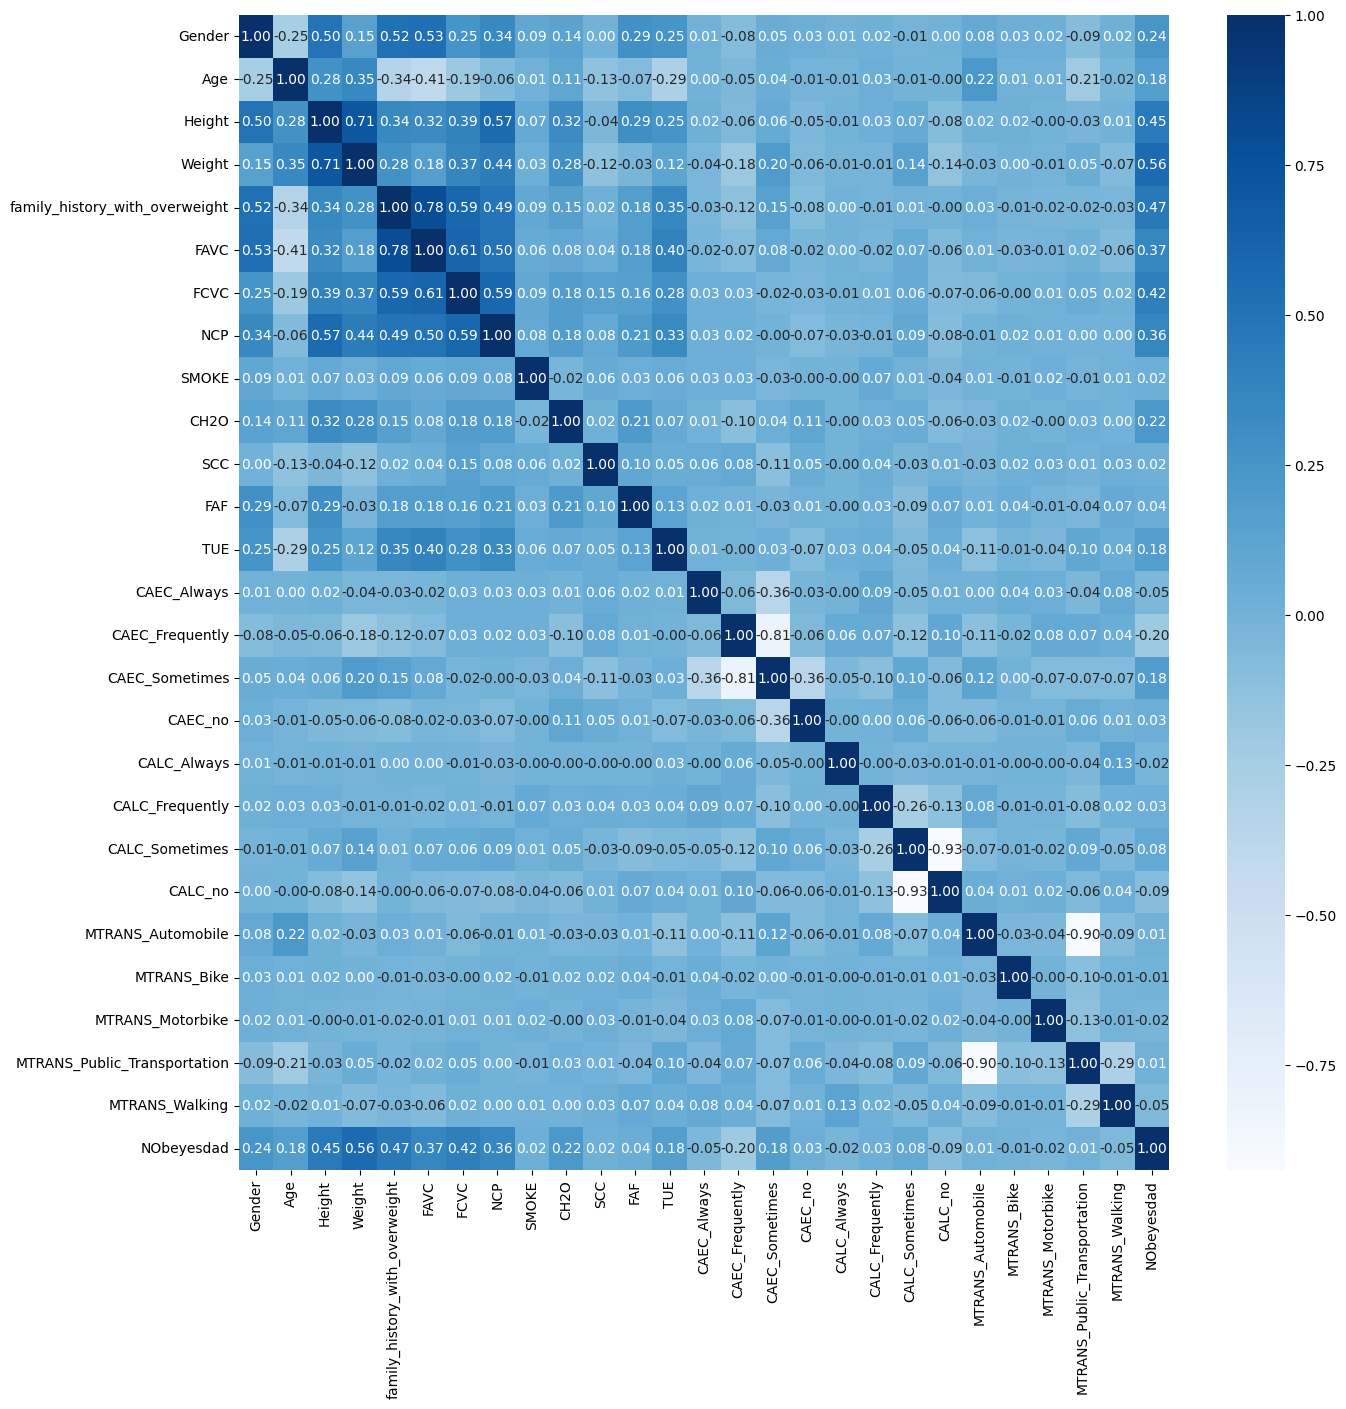

In [ ]:
plt.figure(figsize=(15, 15))
sns.heatmap(XY.corr(), cmap='Blues', annot=True, fmt='.2f')
plt.show()

In [ ]:
XY.corr()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,SMOKE,CH2O,...,CALC_Always,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,NObeyesdad
Gender,1.000000,0.050677,0.621221,0.163642,0.102512,0.064934,-0.317272,0.023921,0.044698,0.108545,...,0.021514,0.034848,-0.037694,0.024163,0.137560,0.057001,0.045203,-0.160184,0.039317,0.024908
Age,0.050677,1.000000,-0.033081,0.190108,0.195552,0.055872,-0.013240,-0.070632,0.097897,-0.045991,...,-0.010260,0.087636,-0.017726,-0.015439,0.604274,0.006784,0.024308,-0.558167,-0.054899,0.229053
Height,0.621221,-0.033081,1.000000,0.455845,0.240790,0.171580,-0.068294,0.216081,0.058724,0.212756,...,0.000461,0.050588,0.103636,-0.126312,0.077691,0.031353,-0.007665,-0.092715,0.043444,0.033270
Weight,0.163642,0.190108,0.455845,1.000000,0.495775,0.271174,0.201129,0.126337,0.027167,0.199369,...,-0.017727,-0.040625,0.259437,-0.250122,-0.013469,-0.021058,-0.036478,0.058349,-0.099150,0.386970
family_history_with_overweight,0.102512,0.195552,0.240790,0.495775,1.000000,0.208036,0.008332,0.052504,0.017385,0.146547,...,0.010282,-0.022154,-0.024637,0.033482,0.099327,-0.015435,-0.051011,-0.058927,-0.067076,0.313667
FAVC,0.064934,0.055872,0.171580,0.271174,0.208036,1.000000,-0.073482,-0.019162,-0.050660,0.008658,...,0.007888,-0.056795,0.139611,-0.121809,0.057597,-0.082005,-0.035401,0.028539,-0.179473,0.044582
FCVC,-0.317272,-0.013240,-0.068294,0.201129,0.008332,-0.073482,1.000000,0.138510,0.025567,0.101364,...,-0.007744,0.009175,0.087591,-0.093283,-0.098692,-0.006768,0.018173,0.065938,0.069175,0.014163
NCP,0.023921,-0.070632,0.216081,0.126337,0.052504,-0.019162,0.138510,1.000000,0.035825,0.066167,...,-0.039954,-0.008419,0.138482,-0.137236,0.013557,0.033114,0.017771,-0.034260,0.037951,-0.111780
SMOKE,0.044698,0.097897,0.058724,0.027167,0.017385,-0.050660,0.025567,0.035825,1.000000,-0.031596,...,-0.003176,0.102614,0.012624,-0.052824,0.011873,-0.008416,0.035496,-0.022409,0.017184,-0.023256
CH2O,0.108545,-0.045991,0.212756,0.199369,0.146547,0.008658,0.101364,0.066167,-0.031596,1.000000,...,-0.000175,0.049909,0.061390,-0.082574,-0.046285,0.026441,-0.000582,0.037150,0.009117,0.108063


In [ ]:
res = XY.corr()['NObeyesdad']
res = res.abs()

In [ ]:
res = res.sort_values(ascending = False)
res

NObeyesdad                        1.000000
Weight                            0.559213
family_history_with_overweight    0.466082
Height                            0.451215
FCVC                              0.415770
FAVC                              0.365850
NCP                               0.362527
Gender                            0.241036
CH2O                              0.221495
CAEC_Frequently                   0.202577
CAEC_Sometimes                    0.181774
Age                               0.177365
TUE                               0.176187
CALC_no                           0.091510
CALC_Sometimes                    0.079715
MTRANS_Walking                    0.052801
CAEC_Always                       0.048740
FAF                               0.038291
CAEC_no                           0.031766
CALC_Frequently                   0.026733
SMOKE                             0.024488
MTRANS_Motorbike                  0.018046
SCC                               0.016888
CALC_Always

### Selecting

In [ ]:
select_feature = res.index[1:13]
select_index = [3, 4, 2, 6, 5, 7, 0, 9, 13, 14, 1, 12]

select_feature

Index(['Weight', 'family_history_with_overweight', 'Height', 'FCVC', 'FAVC',
       'NCP', 'Gender', 'CH2O', 'CAEC_Frequently', 'CAEC_Sometimes', 'Age',
       'TUE'],
      dtype='object')

In [ ]:
X_feat = X_GAN[select_feature]
X_feat

,Weight,family_history_with_overweight,Height,FCVC,FAVC,NCP,Gender,CH2O,CAEC_Frequently,CAEC_Sometimes,Age,TUE
0,64,1,162,2,0,3,0,200,0,1,21,100
1,56,1,152,3,0,3,0,300,0,1,21,0
2,77,1,180,2,0,3,1,200,0,1,23,100
3,87,0,180,3,0,3,1,200,0,1,27,0
4,89,0,178,2,0,1,1,200,0,1,22,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4038,50,0,160,1,0,1,0,194,0,1,38,5
4039,93,0,166,1,0,2,0,199,0,1,34,32
4040,64,0,157,1,0,1,0,180,0,1,25,16
4041,62,0,156,1,0,1,0,177,0,1,24,15


In [ ]:
# import numpy as np
# import pandas as pd
# import os
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from numpy.random import randn
from matplotlib import pyplot
# from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

#Decision Tree Method#


###Node Class###

In [ ]:
class Node():
    def __init__(self, feature_index = None, threshold = None, left = None, right = None, info_gain = None, value = None):

        # for decision node
        self.feature_index = feature_index
        self.threshold = threshold
        self.left = left
        self.right = right
        self.info_gain = info_gain

        # for leaf node
        self.value = value

###Tree Class###

In [ ]:
class DecisionTreeClassifier():
    def __init__(self, min_samples_split = 2, max_depth = 2):

        # initialize the root of the tree
        self.root = None

        # stopping conditions
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth

    def build_tree(self, dataset, curr_depth = 0):
        '''recursive function to build a tree'''

        X, Y = dataset[:, :-1], dataset[:, -1]
        num_samples, num_features = np.shape(X)
        

        # split until stopping conditions are met
        if num_samples >= self.min_samples_split and curr_depth <= self.max_depth:
            # find the best split
            best_split = self.get_best_split(dataset, num_features)
            # check if information gain is positive
            if best_split['info_gain'] > 0 :
                # recur left
                left_subtree = self.build_tree(best_split['dataset_left'], curr_depth +1)
                # recur right
                right_subtree = self.build_tree(best_split['dataset_right'], curr_depth + 1)
                # return decision node
                return Node(best_split['feature_index'], best_split['threshold'], left_subtree, right_subtree, best_split['info_gain'])
        
        # compute leaf node
        leaf_value = self.calculate_leaf_value(Y)
        # return leaf node
        return Node(value = leaf_value)
    
    def get_best_split(self, dataset, num_features):
        '''function to find the best split'''
       
        # dictionary to store the best split
        best_split = {}
        max_info_gain = -float('inf')

        # loop over all features
        for feature_index in range(num_features):
            feature_values = dataset[:, feature_index]
            possible_threshold = np.unique(feature_values)
            # loop over all the feature values present in the data
            for threshold in possible_threshold:
                # get current split
                dataset_left, dataset_right = self.split(dataset, feature_index, threshold)
                # check if childs are not null
                if len(dataset_left) > 0 and len(dataset_right) > 0:
                    y, left_y, right_y = dataset[:, -1], dataset_left[:, -1], dataset_right[:, -1]
                    # conpute information gain
                    curr_info_gain = self.information_gain(y, left_y, right_y, 'gini')
                    # update the best split if needed
                    if curr_info_gain > max_info_gain:
                        best_split['feature_index'] = feature_index
                        best_split['threshold'] = threshold
                        best_split['dataset_left'] = dataset_left
                        best_split['dataset_right'] = dataset_right
                        best_split['info_gain'] = curr_info_gain
                        max_info_gain = curr_info_gain
        
        # return best split
        return best_split
    
    def split(self, dataset, feature_index, threhold):
        '''function to split the data'''
        dataset_left = np.array([row for row in dataset if row[feature_index] <= threhold])
        dataset_right = np.array([row for row in dataset if row[feature_index] > threhold])
        return dataset_left, dataset_right
    
    def information_gain(self, parent, l_child, r_child, mode = 'entropy'):
        '''function to compute information gain'''

        weight_l = len(l_child) / len(parent)
        weight_r = len(r_child) / len(parent)
        if(mode == 'gini'):
            gain = self.gini_index(parent) - (weight_l * self.gini_index(l_child) + weight_r*self.gini_index(r_child))
        else:
            gain = self.entropy(parent) - (weight_l * self.entropy(l_child) + weight_r*self.entropy(r_child))
        return gain
    
    def entropy(self, y):
        '''function to compute entropy'''

        class_labels = np.unique(y)
        entropy = 0
        for cls in class_labels:
            p_cls = len(y[y==cls])/len(y)
            entropy += -p_cls * np.log2(p_cls)
        return entropy
    
    def gini_index(self, y):
        '''function to compute gini index'''
         
        class_labels = np.unique(y)
        gini = 0 
        for cls in class_labels:
            p_cls = len(y[y==cls])/len(y)
            gini += p_cls **2
        return 1- gini
    
    def calculate_leaf_value(self, Y):
        '''function to cumpute leaf node'''

        Y = list(Y)
        return max(Y, key = Y.count)
    
    def print_tree(self, tree = None, indent = " "):
        '''function to compute leaf node'''

        if not tree:
            tree = self.root
        if tree.value is not None:
            print(tree.value)
        else:
            print("X_" + str(tree.feature_index), "<=", tree.threshold, "?", tree.info_gain)
            print("%sleft:" %(indent), end="")
            self.print_tree(tree.left, indent + indent)
            print("%sright:" % (indent), end="")
            self.print_tree(tree.right, indent + indent)
    
    def fit(self, x, y):
        '''function to train the tree'''

        dataset = np.concatenate((x,y), axis = 1)
        self.root = self.build_tree(dataset)

    def predict(self, X):
        '''function to predict new dataset'''

        predictions = [self.make_prediction(x, self.root) for x in X]
        return predictions

    def make_prediction(self, x, tree):
        '''function to predict a single data point'''
        if tree.value != None : return tree.value
        feature_val = x[tree.feature_index]
        if(feature_val <= tree.threshold):
            return self.make_prediction(x, tree.left)
        else:
            return self.make_prediction(x, tree.right) 
    def accuracy(self, y_true, y_pred):
      correct = 0
      for i in range(len(y_true)):
        if(y_pred[i] == y_true[i]):
          correct += 1

      accuracy = correct / len(y_true)
      return accuracy

    def precision(self, y_true, y_pred, num_classes):
      precision_scores = []

      for class_label in range(num_classes):
          true_positives = 0
          false_positives = 0

          for true, pred in zip(y_true, y_pred):
              if pred == class_label and true == class_label:
                  true_positives += 1
              elif pred == class_label and true != class_label:
                  false_positives += 1

          if true_positives + false_positives == 0:
              precision_scores.append(0)
          else:
              precision_scores.append(true_positives / (true_positives + false_positives))

      return precision_scores

    def recall(self, y_true, y_pred, num_classes):
      recall_scores = []

      for class_label in range(num_classes):
          true_positives = 0
          false_negatives = 0

          for true, pred in zip(y_true, y_pred):
              if pred == class_label and true == class_label:
                  true_positives += 1
              elif pred != class_label and true == class_label:
                  false_negatives += 1

          if true_positives + false_negatives == 0:
              recall_scores.append(0)
          else:
              recall_scores.append(true_positives / (true_positives + false_negatives))

      return recall_scores


#Random Forest Method#

###Random Forest Class###

In [ ]:


class RandomForest:
    def __init__(self, n_trees=10, max_depth=10, min_samples_split=2, n_feature=None):
        self.n_trees = n_trees
        self.max_depth=max_depth
        self.min_samples_split=min_samples_split
        self.n_features=n_feature
        self.trees = []

    def fit(self, X, y):
        self.trees = []
        for _ in range(self.n_trees):
            tree = DecisionTreeClassifier(max_depth=self.max_depth,
                            min_samples_split=self.min_samples_split
                            )
            X_sample, y_sample = self._bootstrap_samples(X, y)
            tree.fit(X_sample, y_sample)
            self.trees.append(tree)

    def _bootstrap_samples(self, X, y):
        n_samples = X.shape[0]
        idxs = np.random.choice(n_samples, n_samples, replace=True)
        return X[idxs], y[idxs]

    def _most_common_label(self, y):
        counter = Counter(y)
        most_common = counter.most_common(1)[0][0]
        return most_common

    def predict(self, X):
        predictions = np.array([tree.predict(X) for tree in self.trees])
        tree_preds = np.swapaxes(predictions, 0, 1)
        predictions = np.array([self._most_common_label(pred) for pred in tree_preds])
        return predictions
    
    def accuracy(self, y_true, y_pred):
      correct = 0
      for i in range(len(y_true)):
        if(y_pred[i] == y_true[i]):
          correct += 1

      accuracy = correct / len(y_true)
      return accuracy

    def precision(self, y_true, y_pred, num_classes):
      precision_scores = []

      for class_label in range(num_classes):
          true_positives = 0
          false_positives = 0

          for true, pred in zip(y_true, y_pred):
              if pred == class_label and true == class_label:
                  true_positives += 1
              elif pred == class_label and true != class_label:
                  false_positives += 1

          if true_positives + false_positives == 0:
              precision_scores.append(0)
          else:
              precision_scores.append(true_positives / (true_positives + false_positives))

      return precision_scores

    def recall(self, y_true, y_pred, num_classes):
      recall_scores = []

      for class_label in range(num_classes):
          true_positives = 0
          false_negatives = 0

          for true, pred in zip(y_true, y_pred):
              if pred == class_label and true == class_label:
                  true_positives += 1
              elif pred != class_label and true == class_label:
                  false_negatives += 1

          if true_positives + false_negatives == 0:
              recall_scores.append(0)
          else:
              recall_scores.append(true_positives / (true_positives + false_negatives))

      return recall_scores

###Method

In [ ]:
import numpy as np 

class XGBoostClassifier:
    def __init__(self, n_estimators=100, max_depth=3, learning_rate=0.1, subsample=1.0, colsample=1.0, reg_lambda=1.0):
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.learning_rate = learning_rate
        self.subsample = subsample
        self.colsample = colsample
        self.reg_lambda = reg_lambda
        self.trees = []
        
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self._classes = np.unique(y)
        n_classes = len(self._classes)
        self._f = np.zeros(n_samples)
        
        for i in range(n_classes):
            y_binary = np.where(y == self._classes[i], 1, -1)
            f = np.zeros(n_samples)
            for j in range(self.n_estimators):
                tree = self._fit_tree(X, y_binary, f)
                f += self.learning_rate * tree.predict(X)
                self.trees.append(tree)
            self._f += f
        
    def predict(self, X):
        probs = self.predict_proba(X)
        return self._classes[np.argmax(probs, axis=1)]
    
    def predict_proba(self, X):
        n_samples = X.shape[0]
        n_classes = len(self._classes)
        probs = np.zeros((n_samples, n_classes))
        for tree in self.trees:
            probs += tree.predict_proba(X)
        probs /= self.n_estimators
        return probs
    
    def _fit_tree(self, X, y, f):
        n_samples, n_features = X.shape
        idxs = np.random.choice(n_samples, int(self.subsample * n_samples), replace=False)
        cols = np.random.choice(n_features, int(self.colsample * n_features), replace=False)
        X_subset = X[idxs][:, cols]
        y_subset = y[idxs]
        f_subset = f[idxs]
        tree = DecisionTreeClassifier(max_depth=self.max_depth)
        tree.fit(X_subset, y_subset)
        return tree
    
    def _get_sample_weights(self, y, f):
        # Gradient Boosting sample weights calculation
        p = self._sigmoid(f)
        sample_weights = p * (1 - p)
        sample_weights = np.clip(sample_weights, 1e-6, 1 - 1e-6)
        sample_weights = np.where(y == 1, 1 / sample_weights, 1 / (1 - sample_weights))
        sample_weights /= np.mean(sample_weights)
        return sample_weights
    
    def _sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

#Multilayer Perceptron Method#

###Multilayer Perceptron class###

In [ ]:
def normalize_data(x):
    mean= np.mean(x, axis= 0)
    std= np.std(x, axis= 0)
    x = (x - mean) / std
    return x

In [ ]:
class MultilayerPerceptron():
    def __init__(self, epochs = 10, lr = 0.15, nodes = None):
        self.epochs = epochs
        self.nodes = nodes
        self.lr = lr
        self.weights = self.initialize_weights()


    def  fit(self, x_train, y_train, x_val, y_val):
        for epoch in range(1, self.epochs+1):
            self.weights= self.train(x_train, y_train)

            if(epoch % 20 == 0):
                print("Epoch {}".format(epoch))
                print("Training Accuracy:{}".format(self.accuracy(x_train, y_train)))
                if x_val.any():
                    print("Validation Accuracy:{}".format(self.accuracy(x_val, y_val)))
            
        
    
    def initialize_weights(self):
        layers, weight = len(self.nodes), []
        for i in range(1, layers):
            w = [[np.random.uniform(-1, 1) for k in range(self.nodes[i-1] + 1)]
                for j in range(self.nodes[i])]
            weight.append(np.matrix(w))
    
        return weight

    def forward_propagation(self, x, layers):
        activations, layer_input = [x], x
        for j in range(layers):
            activation = self.sigmoid(np.dot(layer_input, self.weights[j].T))
            activations.append(activation)
            layer_input = np.append(1, activation) # Augment with bias
    
        return activations
    
    def back_propagation(self, y, activations, layers):
        output_final = activations[-1]
        error = np.matrix(y - output_final) # Error at output

        for j in range(layers, 0, -1):
            curr_activation = activations[j]

            if(j > 1):
                # Augment previous activation
                prev_activation = np.append(1, activations[j-1])
            else:
                # First hidden layer, prevActivation is input (without bias)
                prev_activation = activations[0]

            delta = np.multiply(error, self.sigmoid_derivative(curr_activation))
            self.weights[j-1] += self.lr * np.multiply(delta.T, prev_activation)

            w = np.delete(self.weights[j-1], [0], axis=1) # Remove bias from weights
            error = np.dot(delta, w) # Calculate error for current layer

        return self.weights
    
    def train(self, X, Y ):
        layers = len(self.weights)
        for i in range(len(X)):
            x, y = X[i], Y[i]
            x = np.matrix(np.append(1, x)) # Augment feature vector

            activations = self.forward_propagation(x, layers)
            weight = self.back_propagation(y, activations, layers)

        return weight

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        return np.multiply(x, 1-x)
    

    def predict(self,item):
        layers = len(self.weights)
        item = np.append(1, item) # Augment feature vector

        ##_Forward Propagation_##
        activations = self.forward_propagation(item, layers)

        output_final = activations[-1].A1
        index = self.find_max_activation(output_final)

        # Initialize prediction vector to zeros
        y = [0 for i in range(len(output_final))]
        y[index] = 1  # Set guessed class to 1

        return y # Return prediction vector

    def predictv2(self, x_test):
        y_pred = []
        layers = len(self.weights)
        for i in range(len(x_test)):
          item = np.append(1, x_test[i]) # Augment feature vector

          ##_Forward Propagation_##
          activations = self.forward_propagation(item, layers)

          output_final = activations[-1].A1
          index = self.find_max_activation(output_final)

          # Initialize prediction vector to zeros
          y = [0 for i in range(len(output_final))]
          y[index] = 1  # Set guessed class to 1
          y_pred.append(y)


        return y_pred # Return prediction vector


    def find_max_activation(self, output):
        """Find max activation in output"""
        m, index = output[0], 0
        for i in range(1, len(output)):
            if(output[i] > m):
                m, index = output[i], i
    
        return index
    

    def accuracy(self, X, Y):
        """Run set through network, find overall accuracy"""
        correct = 0

        for i in range(len(X)):
            x, y = X[i], list(Y[i])
            guess = self.predict(x)

            if(y == guess):
                # Guessed correctly
                correct += 1

        return correct / len(X)
    
    def accuraci(self, y_true, y_pred):
        correct = 0
        for i in range(len(y_true)):
            if(list(y_true[i]) == list(y_pred[i])):
                # Guessed correctly
                correct += 1

        return correct / len(y_true)

    def precision(self, y_true, y_pred):
      true_positives = 0
      false_positives = 0

      for true, pred in zip(y_true, y_pred):
          if pred == 1 and true == 1:
              true_positives += 1
          elif pred == 1 and true == 0:
              false_positives += 1

      if true_positives + false_positives == 0:
          return 0

      precision_score = true_positives / (true_positives + false_positives)
      return precision_score

    def recall(self, y_true, y_pred):
      true_positives = 0
      false_negatives = 0
      
      for true, pred in zip(y_true, y_pred):
          print(true, pred)
          if pred == 1 and true == 1:
              true_positives += 1
          elif pred == 0 and true == 1:
              false_negatives += 1
      
      if true_positives + false_negatives == 0:
          return 0
      
      recall_score = true_positives / (true_positives + false_negatives)
      return recall_score

# Decision Tree with GAN and Feature Selection

###Split Data###

In [ ]:

X_values = X_feat.iloc[:, :].values
Y_values = Y_GAN.iloc[:, :].values
X_train, X_test, Y_train, Y_test = train_test_split(X_values, Y_values, test_size =.2, random_state = 41)


###Training Model####

In [ ]:
classifier = DecisionTreeClassifier(min_samples_split= 3, max_depth = 100)
classifier.fit(X_feat.values, Y_GAN.values)

###Calculate the Accuracy###

In [ ]:
def precision_average(list_precision):
  precision = 0
  for i in range(len(list_precision)):
    precision += list_precision[i]

  return precision/len(list_precision)


In [ ]:
Y_pred = classifier.predict(X_test)
print(Y_pred)
print("Testing Accuracy: {}".format(classifier.accuracy(Y_test, Y_pred)))
print(precision_average(classifier.precision( Y_test, Y_pred, 6)))
print(precision_average(classifier.recall( Y_test, Y_pred, 6)))

[1, 0, 0, 3, 2, 2, 0, 2, 6, 3, 1, 2, 1, 4, 1, 1, 6, 5, 3, 2, 4, 4, 2, 2, 1, 2, 2, 2, 1, 1, 3, 1, 4, 0, 1, 3, 3, 4, 2, 2, 6, 3, 1, 1, 1, 1, 2, 2, 1, 5, 5, 2, 1, 1, 3, 4, 0, 1, 0, 5, 2, 3, 2, 4, 4, 2, 6, 0, 2, 2, 2, 3, 2, 5, 4, 2, 6, 3, 1, 3, 2, 2, 0, 2, 0, 1, 4, 0, 2, 2, 0, 5, 4, 1, 0, 4, 6, 1, 0, 1, 2, 6, 2, 5, 2, 6, 0, 4, 1, 3, 3, 1, 0, 1, 3, 4, 3, 1, 5, 6, 2, 4, 0, 4, 4, 1, 2, 4, 1, 1, 2, 4, 2, 1, 1, 3, 6, 0, 2, 6, 2, 3, 4, 1, 0, 2, 5, 0, 5, 4, 2, 3, 6, 0, 3, 1, 1, 6, 0, 2, 4, 6, 4, 1, 5, 4, 2, 1, 2, 3, 4, 5, 2, 2, 4, 0, 4, 4, 0, 1, 1, 3, 2, 2, 3, 1, 1, 4, 1, 1, 2, 0, 1, 2, 3, 1, 3, 0, 1, 0, 1, 2, 4, 5, 1, 2, 0, 6, 2, 0, 0, 0, 1, 5, 2, 3, 1, 4, 3, 0, 0, 0, 5, 6, 3, 2, 1, 6, 2, 1, 1, 2, 1, 0, 0, 4, 1, 6, 3, 1, 3, 1, 1, 2, 6, 4, 2, 2, 6, 6, 4, 3, 6, 2, 2, 3, 4, 2, 0, 4, 4, 3, 1, 0, 1, 3, 5, 0, 4, 2, 0, 2, 6, 0, 4, 1, 2, 3, 4, 1, 4, 1, 0, 1, 0, 3, 0, 3, 6, 1, 1, 1, 5, 1, 0, 3, 3, 0, 3, 5, 1, 0, 2, 1, 3, 0, 4, 3, 4, 2, 1, 2, 5, 5, 5, 1, 1, 2, 4, 3, 2, 3, 2, 2, 0, 6, 0, 2, 2, 6, 5, 1, 6, 

# Random Forest with 

###Split Data###

In [ ]:

X_values = X_feat.iloc[:, :].values
Y_values = Y_GAN.iloc[:, :].values
X_train, X_test, Y_train, Y_test = train_test_split(X_values, Y_values, test_size =.2, random_state = 41)


##Training Model###


In [ ]:
random_fores = RandomForest(n_trees=30, max_depth=70, min_samples_split= 7)
random_fores.fit(X_train, Y_train)

## Calculate the Accuracy####

In [ ]:
rf_pred = random_fores.predict(X_test)
print("Testing Accuracy: {}".format(random_fores.accuracy(rf_pred, Y_test)))
print("Testing Precision: {}".format(precision_average(random_fores.precision(Y_test, rf_pred, 6))))
print("Testing Recall: {}".format(precision_average(random_fores.recall( Y_test, rf_pred, 6))))

Testing Accuracy: 0.9517923362175525
Testing Precision: 0.9529193572233936
Testing Recall: 0.9534348729005458


# MLP with

In [ ]:
encoded_y = pd.get_dummies(Y_GAN.NObeyesdad).values


###Normalize Features####

In [ ]:
X_normalize = normalize_data(X_feat)
X_normalize = np.array(X_normalize)

###Spilt Data###

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X_normalize, encoded_y, test_size=0.15)
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.1)

###Training Dataset####

In [ ]:
f = len(X_normalize[0]) # Number of features
o = len(encoded_y[0]) # Number of outputs / classes



layers = [f, 5, 10, 15,  o] # Number of nodes in layers
lr, epochs = 0.02, 400

mlp= MultilayerPerceptron( epochs=epochs, nodes=layers, lr=lr)
mlp.fit(X_train, Y_train, X_val, Y_val)

Epoch 20
Training Accuracy:0.5591849935316947
Validation Accuracy:0.561046511627907
Epoch 40
Training Accuracy:0.7370633893919794
Validation Accuracy:0.7267441860465116
Epoch 60
Training Accuracy:0.7800776196636481
Validation Accuracy:0.7819767441860465
Epoch 80
Training Accuracy:0.8376455368693402
Validation Accuracy:0.8546511627906976
Epoch 100
Training Accuracy:0.8706338939197931
Validation Accuracy:0.8633720930232558
Epoch 120
Training Accuracy:0.8838939197930142
Validation Accuracy:0.8662790697674418
Epoch 140
Training Accuracy:0.8926261319534282
Validation Accuracy:0.872093023255814
Epoch 160
Training Accuracy:0.9023285899094438
Validation Accuracy:0.8924418604651163
Epoch 180
Training Accuracy:0.9065329883570504
Validation Accuracy:0.8982558139534884
Epoch 200
Training Accuracy:0.9113842173350583
Validation Accuracy:0.9098837209302325
Epoch 220
Training Accuracy:0.9113842173350583
Validation Accuracy:0.9069767441860465
Epoch 240
Training Accuracy:0.9123544631306598
Validation Ac

###Accuracy Model###

In [ ]:
y_pred = mlp.predictv2(X_test)
print("Testing Accuracy: {}".format(mlp.accuraci(Y_test, y_pred)))

Testing Accuracy: 0.0


In [ ]:
X_test

array([[-1.18071066, -0.86352893, -1.51275871, ...,  0.45046176,
        -0.9013039 , -0.66661293],
       [-0.01914161, -0.86352893,  1.17508109, ...,  0.45046176,
        -0.22896373,  1.09737899],
       [ 0.59794195,  1.15803879, -0.6488102 , ...,  0.45046176,
        -0.45307712,  1.96923706],
       ...,
       [-0.8903184 ,  1.15803879, -1.1287816 , ...,  0.45046176,
         1.11571661,  1.09737899],
       [ 0.70683904, -0.86352893,  0.2151383 , ...,  0.45046176,
         0.33131975, -0.13944293],
       [ 1.6506139 , -0.86352893,  1.5590582 , ...,  0.45046176,
         2.68451035, -0.13944293]])

#**Decision Tree without GAN and Feature Selection**#

---




###Split Data###

In [ ]:

X_values = X.iloc[:, :].values
Y_values = y.iloc[:, :].values
X_train, X_test, Y_train, Y_test = train_test_split(X_values, Y_values, test_size =.2, random_state = 41)


###Training Model####

In [ ]:
classifier = DecisionTreeClassifier(min_samples_split= 3, max_depth = 100)
classifier.fit(X_train, Y_train)

###Calculate the Accuracy###

In [ ]:
def precision_average(list_precision):
  precision = 0
  for i in range(len(list_precision)):
    precision += list_precision[i]

  return precision/len(list_precision)


In [ ]:
Y_pred = classifier.predict(X_test)
print(Y_pred)
print("Testing Accuracy: {}".format(classifier.accuracy(Y_pred, Y_test)))
print(precision_average(classifier.precision( Y_test, Y_pred, 6)))
print(precision_average(classifier.recall( Y_test, Y_pred, 6)))

[6, 0, 3, 3, 2, 0, 1, 2, 1, 3, 2, 2, 5, 1, 4, 0, 1, 5, 2, 3, 2, 3, 0, 6, 1, 0, 5, 2, 4, 0, 4, 4, 1, 4, 0, 0, 0, 2, 6, 5, 0, 6, 2, 0, 4, 3, 2, 2, 1, 3, 4, 2, 6, 4, 0, 2, 2, 6, 5, 3, 3, 0, 6, 1, 2, 3, 1, 4, 4, 5, 2, 6, 2, 2, 5, 2, 4, 4, 0, 4, 3, 1, 1, 5, 2, 4, 0, 1, 1, 4, 1, 4, 1, 5, 2, 2, 2, 5, 5, 2, 1, 4, 1, 0, 3, 2, 3, 2, 5, 1, 1, 0, 0, 5, 1, 4, 3, 3, 5, 4, 2, 5, 4, 1, 1, 0, 5, 2, 1, 4, 6, 4, 4, 0, 1, 6, 2, 3, 2, 0, 6, 2, 5, 6, 2, 6, 6, 5, 1, 2, 3, 3, 3, 2, 6, 3, 1, 6, 1, 2, 5, 6, 5, 3, 6, 3, 5, 4, 5, 6, 3, 0, 2, 1, 2, 4, 4, 4, 2, 5, 1, 2, 5, 1, 2, 2, 0, 6, 0, 0, 4, 6, 5, 6, 3, 2, 2, 4, 0, 0, 2, 5, 3, 2, 2, 4, 2, 4, 4, 2, 1, 1, 5, 0, 4, 0, 4, 1, 4, 4, 2, 6, 0, 3, 1, 5, 1, 5, 4, 1, 3, 2, 3, 4, 5, 4, 2, 2, 5, 5, 5, 0, 6, 3, 5, 0, 4, 6, 6, 4, 2, 6, 1, 4, 5, 2, 5, 6, 0, 3, 4, 5, 5, 6, 0, 4, 5, 5, 2, 0, 0, 6, 3, 4, 1, 4, 1, 5, 0, 5, 5, 6, 2, 5, 2, 3, 1, 4, 2, 5, 4, 5, 4, 5, 2, 4, 3, 2, 2, 4, 2, 4, 5, 2, 6, 0, 2, 2, 4, 6, 1, 3, 3, 4, 4, 3, 1, 2, 5, 5, 3, 1, 4, 2, 6, 6, 4, 2, 0, 6, 3, 4, 3, 

# Random Forest without GAN and Feature Selection#




###Split Data###

In [ ]:

X_values = X.iloc[:, :].values
Y_values = y.iloc[:, :].values
X_train, X_test, Y_train, Y_test = train_test_split(X_values, Y_values, test_size =.2, random_state = 41)


##Training Model###


In [ ]:
random_fores = RandomForest(n_trees=30, max_depth=70, min_samples_split= 7)
random_fores.fit(X_train, Y_train)

## Calculate the Accuracy####

In [ ]:
rf_pred = random_fores.predict(X_test)
print("Testing Accuracy: {}".format(random_fores.accuracy(rf_pred, Y_test)))
print("Testing Precision: {}".format(precision_average(random_fores.precision(Y_test, rf_pred, 6))))
print("Testing Recall: {}".format(precision_average(random_fores.recall( Y_test, rf_pred, 6))))

Testing Accuracy: 0.950354609929078
Testing Precision: 0.9468345867549299
Testing Recall: 0.9545951653710274


#Multilayer Perceptron without GAN and Feature Selection

###Encode Output/Label####

In [ ]:
encoded_y = pd.get_dummies(y.NObeyesdad).values


###Normalize Features####

In [ ]:
X_normalize = normalize_data(X)
X_normalize = np.array(X_normalize)

###Spilt Data###

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X_normalize, encoded_y, test_size=0.15)
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.1)

###Training Dataset####

In [ ]:
f = len(X_normalize[0]) # Number of features
o = len(encoded_y[0]) # Number of outputs / classes



layers = [f, 5, 10, 15,  o] # Number of nodes in layers
lr, epochs = 0.02, 200

mlp= MultilayerPerceptron( epochs=epochs, nodes=layers, lr=lr)
mlp.fit(X_train, Y_train, X_val, Y_val)

Epoch 20
Training Accuracy:0.3308550185873606
Validation Accuracy:0.32222222222222224
Epoch 40
Training Accuracy:0.7094175960346965
Validation Accuracy:0.7333333333333333
Epoch 60
Training Accuracy:0.8035935563816605
Validation Accuracy:0.7944444444444444
Epoch 80
Training Accuracy:0.879182156133829
Validation Accuracy:0.8444444444444444
Epoch 100
Training Accuracy:0.90272614622057
Validation Accuracy:0.8555555555555555
Epoch 120
Training Accuracy:0.912639405204461
Validation Accuracy:0.8444444444444444
Epoch 140
Training Accuracy:0.9268897149938042
Validation Accuracy:0.8611111111111112
Epoch 160
Training Accuracy:0.9374225526641884
Validation Accuracy:0.8722222222222222
Epoch 180
Training Accuracy:0.9442379182156134
Validation Accuracy:0.8888888888888888
Epoch 200
Training Accuracy:0.959727385377943
Validation Accuracy:0.9055555555555556


###Accuracy Model###

In [ ]:
y_pred = mlp.predictv2(X_test)
print("Testing Accuracy: {}".format(mlp.accuraci(Y_test, y_pred)))

Testing Accuracy: 0.9022082018927445


# WCGAN


In [ ]:
from WCGAN import WCGANGP
from sklearn.preprocessing import MinMaxScaler

In [ ]:
XGAN = dfGAN[x_list]
YGAN = dfGAN['NObeyesdad']
XGAN

In [ ]:
for col in XGAN.columns:
    scaler = MinMaxScaler()
    old_data = np.expand_dims(np.asarray(XGAN[col]), axis=-1)
    new_data = scaler.fit_transform(old_data)
    XGAN[col] = new_data.flatten()

In [ ]:
XGAN

In [ ]:
wcgan = WCGANGP(np.asarray(XGAN), 
                YGAN, 
                latent_dim=8, 
                batch_size=64, 
                n_critic=5,
                )

In [ ]:
wcgan.train(epochs=50)

In [ ]:
from sklearn.datasets import load_wine
data = load_wine()